In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

## Wine data

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# [1] 수업시간에 배운 알고리즘들의 파라미터를 최적화

## data scale 차이가 심하여 정규화를 하고 시작

### Magnisum과 Proline과 다른 feature간의 scale격차가 굉장히 심함 => 정규화필요

In [3]:
from sklearn.preprocessing import StandardScaler
# Z-score를 이용한 정규화
std_scaler = StandardScaler()
# wine data를 정규화 시킨다.
std_scaler.fit(wine.data)
# 정규화 된 데이터 wine_scaled_data 생성
wine_scaled_data = std_scaler.transform(wine.data)
wine_scaled_data
wine_scaled_data.mean()
# 위의 코드로 만들어진 정규화된 데이터를 사용하여 학습알고리즘의 input으로 넣는다.

4.66735072755122e-16

# Split data

In [4]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95)

In [5]:
# 80 : 10 : 10 비율로 잘 나눠졌는지 데이터 크기 관찰
print("x_train 의 크기 : {}".format(x_train.shape))
print("y_train 의 크기 : {}".format(y_train.shape))
print("x_test 의 크기 : {}".format(x_test.shape))
print("y_test 의 크기 : {}".format(y_test.shape))
print("x_valid 의 크기 : {}".format(x_valid.shape))
print("y_valid 의 크기 : {}".format(y_valid.shape))

x_train 의 크기 : (142, 13)
y_train 의 크기 : (142,)
x_test 의 크기 : (18, 13)
y_test 의 크기 : (18,)
x_valid 의 크기 : (18, 13)
y_valid 의 크기 : (18,)


# KNN Classifier

### Requirements : 수업시간에 배운 metric 들 중 최소 두 개 비교 ,이웃의 개수 k 를 최소 3개 비교

### 1) 최적의 hyper parameter 도출

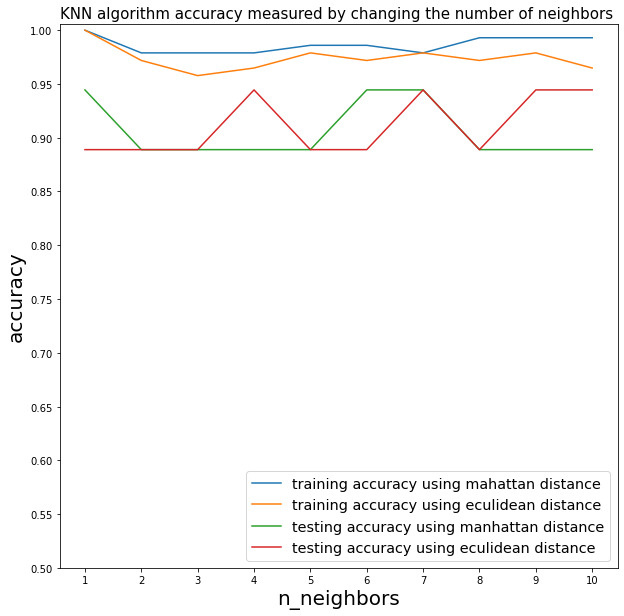

In [45]:
# graph setting
import numpy as np
plt.figure(figsize=(10.0,10.0))
# title
plt.title('KNN algorithm accuracy measured by changing the number of neighbors ',fontsize='15')
# plt의 x 축
plt.xlabel('n_neighbors',fontsize='20')
# plt의 y 축
plt.ylabel('accuracy',fontsize='20')

# KNN algorithm을 사용하여 성능평가를 위한 함수 작성
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## grid_search를 극소적으로 구현

## test accuracy 측정
def test_estimator(train_data, train_label, test_data, test_label, metric, legend):
    score=[] # 점수를 담아둘 리스트
    for k in range(1,11): # neighbor size 1 ~ 20
        # training phase
            # none
        # testing phase
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,p=metric)
        knn.fit(train_data,train_label)
        y_pred = knn.predict(test_data)
        # 각각의 결과에 대한 점수를 리스트에 추가
        score.append((test_label == y_pred).mean())
    # 점수를 그래프로 시각화 EDA
    plt.plot([i for i in range(1,11)],score,label=legend)
    # 점수리스트 초기화
    score=[]

## training accuracy 측정
def training_estimator(train_data, train_label,metric,legend):
    score=[]
    for k in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,p=metric)
        knn.fit(train_data,train_label)
        # training data로 성능측정을 하는 것이므로 predict시에 training data가 input으로 들어가야 한다.
        y_pred = knn.predict(train_data)
        score.append((train_label == y_pred).mean())
    plt.plot([i for i in range(1,11)],score,label=legend)
    score=[]
# training 데이터로 training accuracy 측정 - 맨하탄 거리
training_estimator(x_train,y_train,1,'training accuracy using mahattan distance')
# training 데이터로 training accuracy 측정- 유클리드 거리
training_estimator(x_train,y_train,2,'training accuracy using eculidean distance')
# valid 데이터로 testing accuracy 측정 - 맨하탄 거리
test_estimator(x_train,y_train,x_valid,y_valid,1, 'testing accuracy using manhattan distance')
# valid 데이터로 testing accuracy 측정 - 유클리드 거리
test_estimator(x_train,y_train,x_valid,y_valid,2, 'testing accuracy using eculidean distance')
# graph setting
plt.legend(loc='lower right',fontsize='x-large')
x_bins = np.arange(1,11,step=1)
plt.xticks(x_bins)
y_bins = np.arange(0.5,1.05,step=0.05)
plt.yticks(y_bins)
plt.show()

### 결과 : k가 9일때, metric은 euclidean distance 인 경우 결과가 가장 좋았다.

### 2) 최종 성능 평가

In [46]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
import numpy as np
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)
# 잘합쳐졌는지 확인
# 178개의 instance 9: 1 분할 이므로 178 * 0.9 = 160개의 데이터
print("x_train 의 크기 : {}".format(x_train.shape))
print("y_train 의 크기 : {}".format(y_train.shape))

x_train 의 크기 : (160, 13)
y_train 의 크기 : (160,)


In [47]:
# 제일 좋았던 hyper paramter인 k =4와 eculidean distance으로 setting하고 합쳐진 90%의 training data로 학습을 진행한다.
knn = KNeighborsClassifier(n_neighbors=4, p=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_score = (y_pred == y_test).mean()
# accuracy_score() == score() == (y_pred == y_test).mean() 모두 같은 결과 나온다. 셋 중 아무거나 사용한다.
print("KNN의 최종 accuracy는 %.6f %%입니다."%(knn_score*100))

KNN의 최종 accuracy는 94.444444 %입니다.


# [Decision Tree Classifier]

## Requirements : gini 와 entropy criterion의 비교

<strong> 수업시간에 중요하게 다뤘던 hyper parameter인 max_depth를 추가하여 비교 </strong>

### 1)최적의 hyper parameter 도출

In [48]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95)

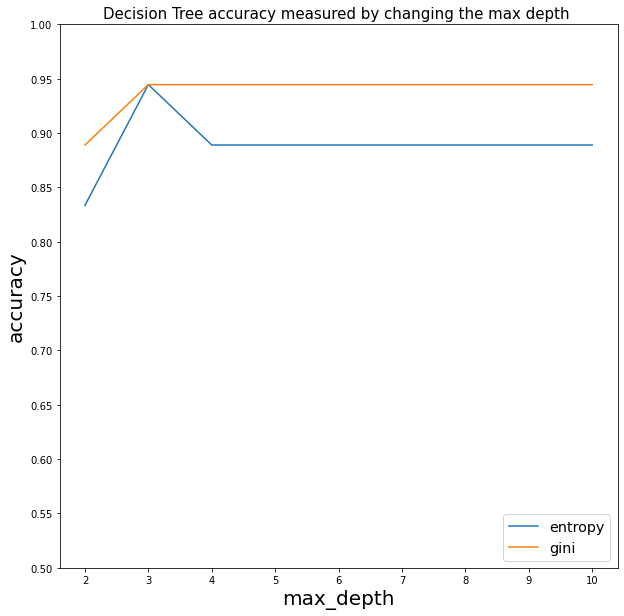

In [49]:
from sklearn import tree
# graph setting
plt.figure(figsize=(10.0,10.0))
plt.title('Decision Tree accuracy measured by changing the max depth ',fontsize='15')
plt.xlabel('max_depth',fontsize='20')
plt.ylabel('accuracy',fontsize='20')

# 각 hyper parameter에서 나타나는 정확도를 성능지표로 삼기위해 리스트 생성
score = []
# criterion='entropy' 이면서 max_depth를 바꿔가며 정확도 측정
for depth in range(2,11):
    dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_valid)
    score.append(accuracy_score(y_valid,y_pred))
plt.plot([i for i in range(2,11)],score,label='entropy')

# criterion='gini' 이면서 max_depth를 바꿔가며 정확도 측정
score = []
for depth in range(2,11):
    dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_valid)
    score.append(accuracy_score(y_valid,y_pred))
plt.plot([i for i in range(2,11)],score,label='gini')

score=[]
# graph setting
plt.legend(loc='lower right',fontsize='x-large')
x_bins = np.arange(2,11,step=1)
plt.xticks(x_bins)
y_bins = np.arange(0.5,1.05,step=0.05)
plt.yticks(y_bins)
plt.show()

### 결과 :  max_depth = 3이고 criterion이 entropy일 때 정확도가 가장높았다.

### 2) 최종 성능평가

In [50]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [51]:
# 제일 좋았던 hyper paramter인 max_depth = 3 과 entropy로 setting하고 합쳐진 90%의 training data로 학습을 진행한다.
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dt_score =  accuracy_score(y_test,y_pred)
print("Decision Tree의 최종 accuracy는 %.2f %%입니다."%(dt_score*100))

Decision Tree의 최종 accuracy는 83.33 %입니다.


# [Ensembel Classifier]

### Requirements : Ensembel approach에서 Random Forest와 Bagging 비교하기

## 1. Random Forest

### 1) 비교  hyper parameter로는 Decision Tree에서 가장 좋았던 max_depth = 3와 criterion = entropy 사용

In [52]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95) 

In [53]:
from sklearn.ensemble import RandomForestClassifier
#생성되는 나무의 수 100개, criterion = gini, bootstrap 작동, max_feature = sqrt(feature) = auto
rf = RandomForestClassifier(max_depth = 3, n_estimators = 100, criterion ='entropy', bootstrap=True)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_valid)
rf_score = (y_valid == y_pred).mean()
print("실제 레이블과 일치율 : %.2f %%입니다."%(rf_score*100))

실제 레이블과 일치율 : 88.89 %입니다.


### 2) 최종 성능 평가

In [54]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [55]:
rf = RandomForestClassifier(max_depth = 3, n_estimators = 100, criterion ='entropy', bootstrap=True)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_score=(y_test == y_pred).mean()
print("예측과 테스트 데이터 일치율 : %.2f %%입니다."%(rf_score*100))

final score : 100.00 %입니다.


## 2. Bagging

### 1) 비교  hyper parameter로는 Decision Tree에서 가장 좋았던 max_depth = 3와 criterion = entropy 사용

In [56]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95) 

In [57]:
from sklearn.ensemble import BaggingClassifier
# base_estimator라는 parameter가 있는데 이는 각  phase에서 learning algorithm으로 쓸 것을 말한다. default가 decision tree임
bg = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3,criterion = 'entropy'),n_estimators = 100, bootstrap=True)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_valid)
bg_score = (y_valid==y_pred).mean()
print("실제 레이블과 일치율 : %.2f %%입니다."%(bg_score*100))

실제 레이블과 일치율 : 88.89 %입니다.


### 2) 최종 성능 평가

In [58]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [61]:
bg = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3,criterion='entropy'),n_estimators = 100, bootstrap=True)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)
bg_score = (y_test == y_pred).mean()
print("예측과 테스트 데이터 일치율 : %.2f%%입니다."%(bg_score*100))

예측과 테스트 데이터 일치율 : 100.00%입니다.


# [SVM]

### Requirments : A.	linear SVM과 kernel trick이 적용된 SVM간의 비교 (kernel 의 종류는 상관 없음) 

## 1. Linear SVM 

In [62]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95) 

### 1) Margin과 관련된  hyper parameter 인 c를 변화시켜가면서 Linear일 때 최적의 c를 찾는다.

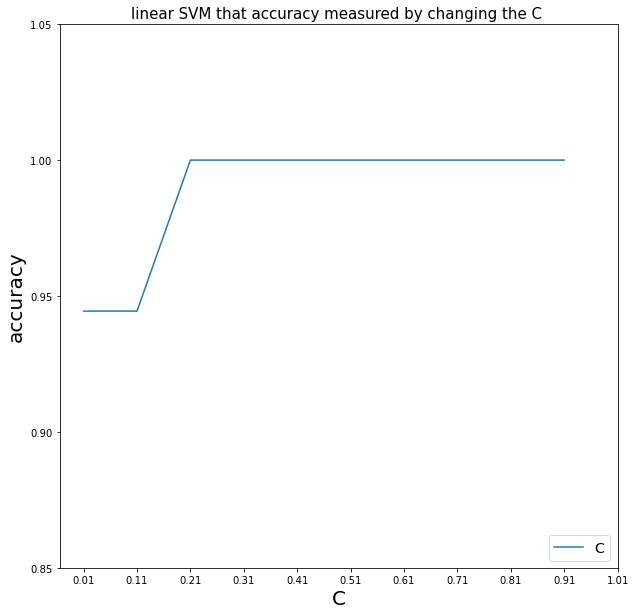

In [63]:
from sklearn import svm

# graph setting
plt.figure(figsize=(10.0,10.0))
plt.title('linear SVM that accuracy measured by changing the C ',fontsize='15')
plt.xlabel('C',fontsize='20')
plt.ylabel('accuracy',fontsize='20')

# 각 hyper parameter에서 나타나는 정확도를 성능지표로 삼기위해 리스트 생성
score = []

# 0.01부터 0.1씩 증가시키면서 최적의 C를 찾는다.
for c in np.arange(0.01, 1, step=0.1):
    # kernel function이 linear이고 margin의 간격 허용치를 점점 더 줄인다.. soft margin -> hard margin
    # c가 작으면 그만큼 허용하는 slack variable이 커 질 수 있으므로 허용치가 c가 작을 수록 높아진다.
    ls = svm.SVC(kernel = 'linear' , C=c)
    ls.fit(x_train,y_train)
    y_pred = ls.predict(x_valid)
    score.append((y_valid==y_pred).mean())

plt.plot([i for i in np.arange(0.01,1,step=0.1)],score,label='C')

# graph setting
plt.legend(loc='lower right',fontsize='x-large')
x_bins = np.arange(0.01,1.1,step=0.1)
plt.xticks(x_bins)
y_bins = np.arange(0.85,1.05,step=0.05)
plt.yticks(y_bins)
plt.show()

### 결과 : C >= 0.21 부터는 상당히 높은 정확도를 보인다.

### 2) 최종 성능 평가

In [64]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [68]:
# C가 0.21 이상부터는 동일한 정확도를 보인다. 때문에 0.21보다 큰 값이고 간단한 1을 선택한다.
ls = svm.SVC(kernel = 'linear', C=1)
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
ls_score = (y_test == y_pred).mean()
print("예측과 테스트 데이터 일치율 :  %.2f%%입니다."%(ls_score*100))

예측과 테스트 데이터 일치율 :  100.00%입니다.


## 2. Kernel Trick

### 1) 여러가지 커널 트릭을 사용해보고 제일 좋은 것을 고른다. c는 1로 선택한다.

In [69]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95) 

In [70]:
from sklearn import svm
#사용 가능한 Kernel function의 종류는 rbf, poly, sigmoid 3가지가 있다.
kernel_list = ['rbf', 'poly','sigmoid']

score = []
# 3가지 kernel function에 대해 각각의 정확도를 테스트 하고 제일 좋은 kernel function을 찾아본다
for k in kernel_list:
    ksv = svm.SVC(kernel = k, C=1)
    ksv.fit(x_train,y_train)
    y_pred = ksv.predict(x_valid)
    score.append((y_pred==y_valid).mean())
#각각의 kernel function이 받았던 점수를 출력한다.
for kl, s in zip(kernel_list,score):
    print('kernel %s의 점수는 %.2f 입니다.'%(kl,s))

kernel rbf의 점수는 1.00 입니다.
kernel poly의 점수는 0.89 입니다.
kernel sigmoid의 점수는 0.94 입니다.


### 결과 : kernel trick 중 가장 좋은 것은 rbf 였다.

### 2) 최종 성능 평가

In [71]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [72]:
for k in ['rbf', 'poly', 'sigmoid']:
    ksv = svm.SVC(kernel = k, C=1)
    ksv.fit(x_train,y_train)
    y_pred = ksv.predict(x_test)
    score = (y_test == y_pred).mean()
    print("kernel %s의 final score는 %.2f입니다."%(k,score))

kernel rbf의 final score는 1.00입니다.
kernel poly의 final score는 0.89입니다.
kernel sigmoid의 final score는 1.00입니다.


# [2] Cross-validation을 이용한 최적화된 알고리즘 탐색

### 1) 저는 최적의 모델로 SVM을 선정하였고 
###     이를 토대로 K-fold와 loocv를 통해서 최적의 하이퍼 파라미터를 찾아보겠습니다.

In [73]:
# 데이터를 90:10으로 분할
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1,random_state=95)

### 1-1) pipeline 생성,  여러가지 k값을 가지고 Grid searchCV를 진행합니다

| k=2일 때, 최고점수 : 0.981250 |
| k=2일 때, 최적의 파라미터 : {'clf__C': 1.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'} |
--------------------------------------------------------------------------------------------------
| k=3일 때, 최고점수 : 0.981249 |
| k=3일 때, 최적의 파라미터 : {'clf__C': 1.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'} |
--------------------------------------------------------------------------------------------------
| k=4일 때, 최고점수 : 0.981250 |
| k=4일 때, 최적의 파라미터 : {'clf__C': 0.1, 'clf__kernel': 'linear'} |
--------------------------------------------------------------------------------------------------
| k=5일 때, 최고점수 : 0.981250 |
| k=5일 때, 최적의 파라미터 : {'clf__C': 0.1, 'clf__kernel': 'linear'} |
--------------------------------------------------------------------------------------------------
| k=6일 때, 최고점수 : 0.981007 |
| k=6일 때, 최적의 파라미터 : {'clf__C': 1.0, 'clf__kernel': 'linear'} |
--------------------------------------------------------------------------------------------------
| k=7일 때, 최고점

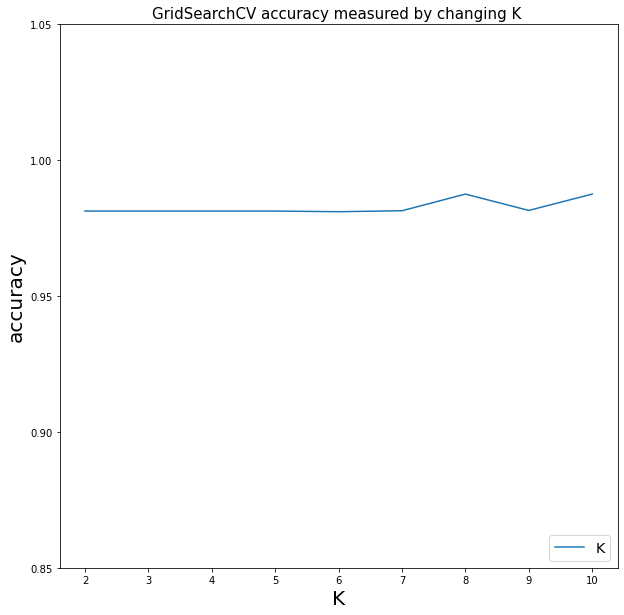

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# graph setting
plt.figure(figsize=(10.0,10.0))
plt.title('GridSearchCV accuracy measured by changing K ',fontsize='15')
plt.xlabel('K',fontsize='20')
plt.ylabel('accuracy',fontsize='20')

# pipeline 생성 데이터를 정규화 시키고, 학습시킬 알고리즘으로 svm을 선택
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

# 최적의 hyper prameter c를  찾기위해서  8가지 후보를 두고 grid search를 진행 
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# 1 아래의 parmeter들과 위의 c가 한번 씩 모두 들어가서 brute-force를 진행함으로써 제일 좋은 파라미터를  결과로 도출해준다.
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['poly']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['sigmid']}]

score = []
for cv in range(2,11):
    # 그리드 서치 진행 
    gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
    gs.fit(x_train,y_train)
    score.append(gs.best_score_)
    # 각 k에서 제일 좋은 성능을 냈던 파라미터들의 성능을 점수로 표시
    print('| k=%d일 때, 최고점수 : %.6f |'%(cv,gs.best_score_))
    # 각 k에서 제일 좋은 성능을 냈던 파라미터들의 리스트를 dictionary형태로 출력해준다.
    print('| k=%d일 때, 최적의 파라미터 : %s |'%(cv,gs.best_params_))
    print('--------------------------------------------------------------------------------------------------')

plt.plot([i for i in range(2,11)],score,label='K')
# graph setting
plt.legend(loc='lower right',fontsize='x-large')
x_bins = np.arange(2,11,step=1)
plt.xticks(x_bins)
y_bins = np.arange(0.85,1.05,step=0.05)
plt.yticks(y_bins)
plt.show()

### 결과: k=9일 때, 하이퍼 파라미터 {'clf__C': 1.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}가 가장 높았다.

### LOOCV를 통한 성능평가

In [75]:
# caution : 상당히 오래걸리므로 차분히 기다린다. => 안된다고 끄지말 것
from sklearn.model_selection import LeaveOneOut
    
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
gs.fit(x_train,y_train)
print('최고 점수는 : %.2f 입니다.' % gs.best_score_)
print("Leave One Out validation으로 평가한 최적의 hyper prameter는 %s 입니다."%gs.best_params_)

최고 점수는 : 0.98 입니다.
Leave One Out validation으로 평가한 최적의 hyper prameter는 {'clf__C': 1.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'} 입니다.
